## Prediction

### Why estimate $f$?

We can think of a given dataset upon which we are working as a representation of some actual phenomenon. We can imagine there to be some sort of "universal" function, $f$, that was used to generate the data, one that we can never truly know.

As data scientists, we will seek to estimate this function. We will call our estimate $\widehat{f}$ ("eff hat").

There are two main reasons we might want to estimate $f$ with $\hat{f}$:

- prediction
   - given some set of known inputs and known outputs, we may wish to create some function that can take a new set of inputs and predict what the output would be for these inputs
- inference
   - given some set of known inputs and (optionally) known outputs, we may wish to understand how the inputs (and outputs) interact with each other

In [1]:
%pwd

'/home/jovyan/introductiontodatascience/source/01-seeds'

#### What does `pwd` tell us? What does this mean in the context of a Jupyter Notebook? Why would it be important to think about this before we load a csv file?

In [2]:
%ls

01-00-seeds.ipynb                       01-05-the-train-test-split.ipynb
01-01-interactive-programming.ipynb     01-06-inference.ipynb
01-02-Python.ipynb                      data/
01-03-the-python-numerical-stack.ipynb  doc/
01-04-prediction.ipynb


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

from patsy import dmatrices

In [4]:
seeds_data = pd.read_csv('data/seeds_data.csv', index_col=0)

In [5]:
seeds_data.describe()

,area,perimeter,compactness,length_of_kernel,width_of_kernel_,asymmetry_coefficient_,length_of_kernel_groove,Class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


<Figure size 1440x720 with 0 Axes>

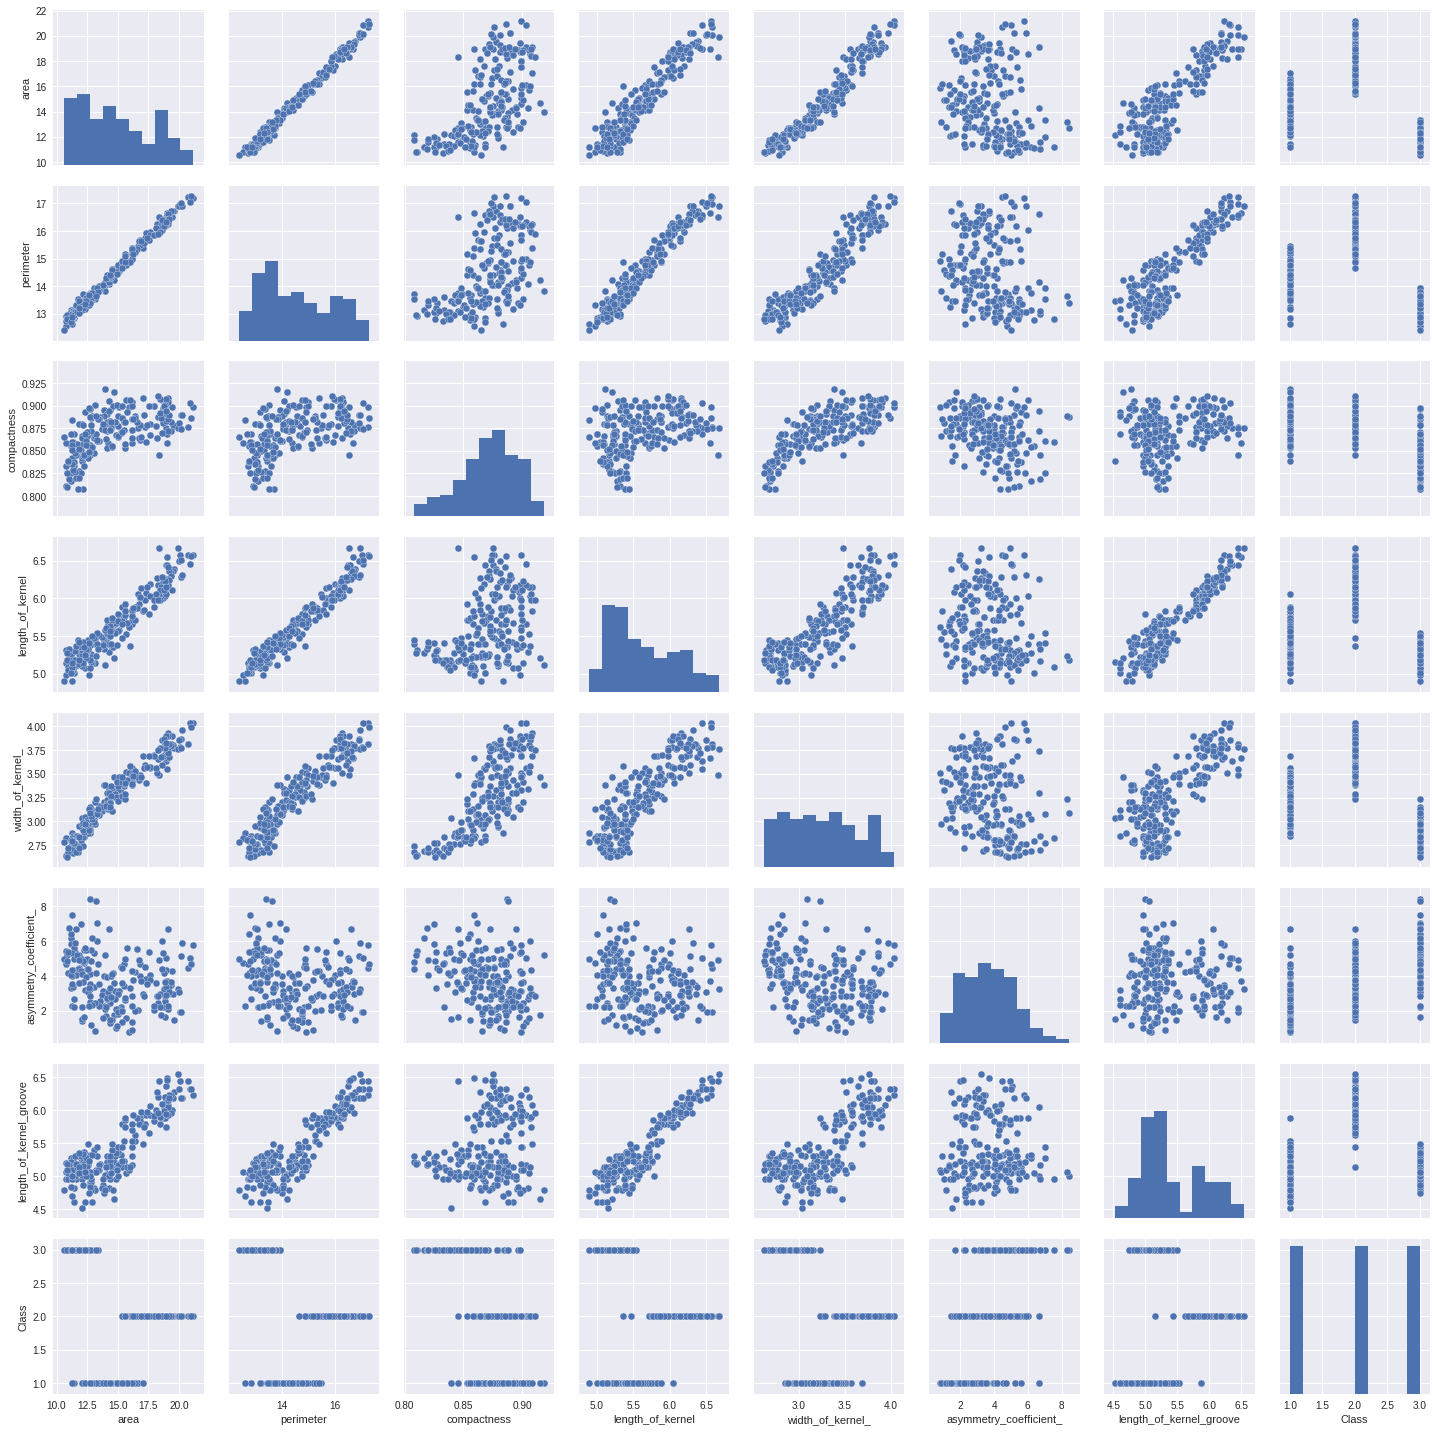

In [6]:
plt.figure(1, (20,10))

sns.pairplot(seeds_data)

Having a look at the pair plot, we might say that we are able to the uniformity of cell shape using the uniformity of cell size.

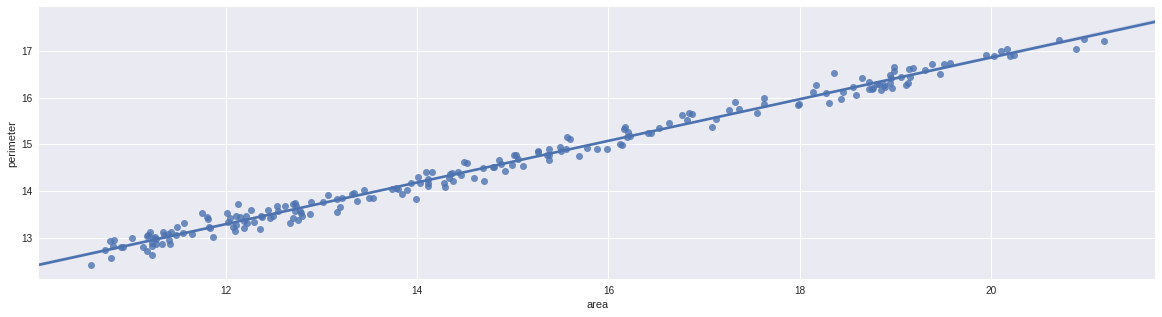

In [7]:
plt.figure(1, (20,5))

sns.regplot('area','perimeter', data=seeds_data)

### Linear Regression

We might build a **simple regression model** to do this for us using scikit-learn. Here, the **input variable** would be `petal length` and the **output variable** would be `petal width`.

We will usually refer to our input variable(s) as **feature(s)** and our output variable as the **target**.

### Build a Simple Regression Model

In [8]:
target, features = dmatrices("perimeter ~ area", seeds_data)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
linear_regression_model = LinearRegression(fit_intercept=False)
linear_regression_model.fit(features, target)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

### Plot the Results

Having prepared the regression model, we use it to make predictions.

We then plot the predictions versus the actual values.


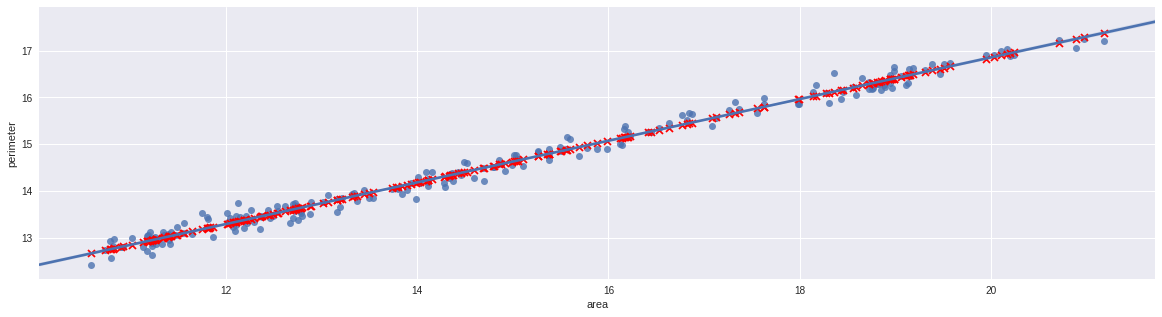

In [11]:
plt.figure(1, (20,5))

sns.regplot('area','perimeter', data=seeds_data)

predictions = linear_regression_model.predict(features)
plt.scatter(seeds_data.area, predictions, marker='x', color='red')

#### What does this plot show us? 